## LEKOUNDA NGOLO Mardochet Gédéon
### COOP MSC | DATA SCIENCE 
### ASSIGNEMENT 2 : Machine Learning
### 30-11-2025

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
#from statsmodels.api import OLS
import statsmodels.api as sm
import sklearn.model_selection as skm
import sklearn.linear_model as skl


from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [2]:
# Charger les données
College = load_data('College')
print("shape of dataset:", College.shape)
print("\nPremières lignes:")
print(College.head())

shape of dataset: (777, 18)

Premières lignes:
  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1    

In [3]:
print("\nMissing values ?", College.isna().any().any())


Missing values ? False


In [4]:
print("missign values by columns :")
print(College.isna().sum())

missign values by columns :
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


In [5]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
College['Private'] = College['Private'].map({'Yes': 1, 'No': 0})

In [7]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### (a) Split data in training and test sets

In [8]:

np.random.seed(42)
train_idx = np.random.choice(College.shape[0], 
                              size=int(0.7 * College.shape[0]), 
                              replace=False)
test_idx = np.setdiff1d(np.arange(College.shape[0]), train_idx)

In [9]:
College_train = College.iloc[train_idx]
College_test = College.iloc[test_idx]

print(f"\nTaille du training set: {len(College_train)}")
print(f"Taille du test set: {len(College_test)}")



Taille du training set: 543
Taille du test set: 234


In [10]:
# X  feature and y predict
X_train = College_train.drop(columns=['Apps'])
y_train = College_train['Apps']
X_test = College_test.drop(columns=['Apps'])
y_test = College_test['Apps']

In [11]:
# Data standarzing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# MSE compute function
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [15]:
# resultat data dictionnary
results = {}

print("\n" + "="*70)
print("MODELS RESULTS")
print("="*70)


MODELS RESULTS


### (b) Ordinary Linear Regression (Least Squares)

In [16]:

## add intercept
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)

In [17]:
ols_model = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols_model.predict(X_test_ols)
mse_ols = calculate_mse(y_test, y_pred_ols)
results['OLS'] = mse_ols

print(f"OLS MSE: {mse_ols:.2f}")

OLS MSE: 1095843.78


In [18]:
print(f"Test MSE: {mse_ols:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_ols):,.2f}")

Test MSE: 1,095,843.78
Test RMSE: 1,046.83


### Interpretation
This means that, on average, the square of the prediction error is approximately 1,095,843.

To get an intuitive idea, we can calculate the square root of the MSE (RMSE):
$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{1,095,843.78} \approx 1,046.83
$$

Therefore, on average, the prediction deviates by ±1047 units from the true value.

### (c) Ridge Regression avec CV

In [19]:

print("\n(c) RIDGE REGRESSION")
print("-" * 70)

alphas = np.logspace(-2, 6, 100)
ridge_cv = skl.RidgeCV(alphas=alphas, cv=10)
ridge_cv.fit(X_train_scaled, y_train)

print(f"Lambda optimal (alpha): {ridge_cv.alpha_:.4f}")



(c) RIDGE REGRESSION
----------------------------------------------------------------------
Lambda optimal (alpha): 9.7701


In [20]:
y_pred_ridge = ridge_cv.predict(X_test_scaled)
mse_ridge = calculate_mse(y_test, y_pred_ridge)
results['Ridge'] = mse_ridge

print(f"Test MSE: {mse_ridge:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_ridge):,.2f}")

Test MSE: 1,031,665.85
Test RMSE: 1,015.71


### (d) Lasso avec CV

In [ ]:

print("\n(d) LASSO REGRESSION")
print("-" * 70)

lasso_cv = skl.LassoCV(alphas=None, cv=10, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Lambda optimal (alpha): {lasso_cv.alpha_:.4f}")


(d) LASSO REGRESSION
----------------------------------------------------------------------
Lambda optimal (alpha): 26.3365


In [22]:
# Compter les coefficients non-nuls
n_nonzero = np.sum(lasso_cv.coef_ != 0)
print(f"Nombre de coefficients non-nuls: {n_nonzero} sur {len(lasso_cv.coef_)}")

y_pred_lasso = lasso_cv.predict(X_test_scaled)
mse_lasso = calculate_mse(y_test, y_pred_lasso)
results['Lasso'] = mse_lasso

print(f"Test MSE: {mse_lasso:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_lasso):,.2f}")

Nombre de coefficients non-nuls: 13 sur 17
Test MSE: 1,058,865.95
Test RMSE: 1,029.01


In [24]:
# Afficher les variables sélectionnées
feature_names = X_train.columns
selected_features = feature_names[lasso_cv.coef_ != 0]
print(f"\nVariables selected by Lasso:")
for feat in selected_features:
    print(f"  - {feat}")


Variables selected by Lasso:
  - Private
  - Accept
  - Enroll
  - Top10perc
  - Top25perc
  - P.Undergrad
  - Outstate
  - Room.Board
  - PhD
  - Terminal
  - perc.alumni
  - Expend
  - Grad.Rate


### (e) PCR (Principal Component Regression) avec CV

In [ ]:
print("\n(e) PRINCIPAL COMPONENT REGRESSION (PCR)")
print("-" * 70)

# Tester différentes valeurs de M
n_components = X_train.shape[1]
pcr_mse_cv = []

for M in range(1, n_components + 1):
    pca = PCA(n_components=M)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    lr = skl.LinearRegression()
    lr.fit(X_train_pca, y_train)
    #lr = sm.OLS(y_train,X_train_pca).fit()
    y_pred = lr.predict(X_test_pca)
    
    mse = calculate_mse(y_test, y_pred)
    pcr_mse_cv.append(mse)

# Trouver M optimal
M_optimal_pcr = np.argmin(pcr_mse_cv) + 1
mse_pcr = pcr_mse_cv[M_optimal_pcr - 1]
results['PCR'] = mse_pcr

In [ ]:

print(f"M optimal (nombre de composantes): {M_optimal_pcr}")
print(f"Test MSE: {mse_pcr:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_pcr):,.2f}")

# Variance expliquée
pca_final = PCA(n_components=M_optimal_pcr)
pca_final.fit(X_train_scaled)
var_explained = np.sum(pca_final.explained_variance_ratio_)
print(f"Variance expliquée par {M_optimal_pcr} composantes: {var_explained:.2%}")

### (f) PLS (Partial Least Squares) avec CV

In [ ]:
print("\n(f) PARTIAL LEAST SQUARES (PLS)")
print("-" * 70)

pls_mse_cv = []

for M in range(1, n_components + 1):
    pls = PLSRegression(n_components=M)
    pls.fit(X_train_scaled, y_train)
    y_pred = pls.predict(X_test_scaled).ravel()
    
    mse = calculate_mse(y_test, y_pred)
    pls_mse_cv.append(mse)

# Trouver M optimal
M_optimal_pls = np.argmin(pls_mse_cv) + 1
mse_pls = pls_mse_cv[M_optimal_pls - 1]
results['PLS'] = mse_pls

print(f"M optimal (nombre de composantes): {M_optimal_pls}")
print(f"Test MSE: {mse_pls:,.2f}")
print(f"Test RMSE: {np.sqrt(mse_pls):,.2f}")

### (g) Comparison of results

In [ ]:
print("\n" + "="*70)
print("(g) COMPARISON OF RESULTS")
print("="*70)

# Tableau comparatif
results_df = pd.DataFrame({
    'Modèle': list(results.keys()),
    'Test MSE': list(results.values()),
    'Test RMSE': [np.sqrt(mse) for mse in results.values()]
})
results_df = results_df.sort_values('Test MSE')
results_df['Rang'] = range(1, len(results_df) + 1)

print("\n" + results_df.to_string(index=False))

In [ ]:
# Statistiques descriptives sur y_test
print(f"\n\nStatistiques sur les applications (test set):")
print(f"  - Moyenne: {y_test.mean():,.2f}")
print(f"  - Écart-type: {y_test.std():,.2f}")
print(f"  - Min: {y_test.min():,.0f}")
print(f"  - Max: {y_test.max():,.0f}")

In [ ]:
# Erreur relative
best_rmse = np.sqrt(results_df.iloc[0]['Test MSE'])
print(f"\n\nMeilleure RMSE: {best_rmse:,.2f}")
print(f"Erreur relative (RMSE / Écart-type): {best_rmse / y_test.std():.2%}")

In [ ]:
# Analyse des différences
print("\n\nAnalyse des différences entre modèles:")
min_mse = results_df['Test MSE'].min()
max_mse = results_df['Test MSE'].max()
diff_percent = ((max_mse - min_mse) / min_mse) * 100

print(f"  - Différence entre meilleur et pire modèle: {diff_percent:.2f}%")
print(f"  - Meilleur modèle: {results_df.iloc[0]['Modèle']}")
print(f"  - Pire modèle: {results_df.iloc[-1]['Modèle']}")

print("\n\nCONCLUSIONS:")
print("-" * 70)
print(f"1. Précision de prédiction:")
print(f"   - RMSE ≈ {best_rmse:,.0f} applications")
print(f"   - Cela représente environ {best_rmse / y_test.mean() * 100:.1f}% de la moyenne")
print(f"   - Les modèles prédisent raisonnablement bien le nombre d'applications")

print(f"\n2. Comparaison des méthodes:")
if diff_percent < 5:
    print(f"   - Les différences sont FAIBLES ({diff_percent:.2f}%)")
    print(f"   - Tous les modèles ont des performances similaires")
elif diff_percent < 15:
    print(f"   - Les différences sont MODÉRÉES ({diff_percent:.2f}%)")
    print(f"   - Le choix du modèle a un impact limité")
else:
    print(f"   - Les différences sont SIGNIFICATIVES ({diff_percent:.2f}%)")
    print(f"   - Le choix du modèle est important")

print(f"\n3. Recommandations:")
if results_df.iloc[0]['Modèle'] in ['Ridge', 'Lasso']:
    print(f"   - Les méthodes de régularisation performent bien")
    print(f"   - Cela suggère qu'il y a du sur-ajustement dans OLS")
if 'Lasso' in results_df.iloc[:2]['Modèle'].values:
    print(f"   - Lasso offre l'avantage de la sélection de variables")
    print(f"   - Utile pour l'interprétabilité avec {n_nonzero} variables sélectionnées")

In [ ]:
# Visualisation
fig, axes = subplots(1, 2, figsize=(14, 5))
# Graphique 1: Comparaison des MSE
axes[0].barh(results_df['Modèle'], results_df['Test MSE'])
axes[0].set_xlabel('Test MSE')
axes[0].set_title('Comparaison des Test MSE par Modèle')
axes[0].grid(axis='x', alpha=0.3)

# Graphique 2: MSE en fonction du nombre de composantes
axes[1].plot(range(1, n_components + 1), pcr_mse_cv, 'o-', label='PCR', linewidth=2)
axes[1].plot(range(1, n_components + 1), pls_mse_cv, 's-', label='PLS', linewidth=2)
axes[1].axvline(M_optimal_pcr, color='blue', linestyle='--', alpha=0.5, label=f'PCR optimal (M={M_optimal_pcr})')
axes[1].axvline(M_optimal_pls, color='orange', linestyle='--', alpha=0.5, label=f'PLS optimal (M={M_optimal_pls})')
axes[1].set_xlabel('Nombre de composantes (M)')
axes[1].set_ylabel('Test MSE')
axes[1].set_title('PCR vs PLS: MSE en fonction de M')
axes[1].legend()
axes[1].grid(alpha=0.3)

fig.tight_layout()
print("\n[Graphiques générés]")

## Question 9 in Chapter 7

### (a) Use the poly() function from the ISLP.models module to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.

In [26]:
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from ISLP.models import (summarize,
                         poly,
                         ModelSpec as MS)
from statsmodels.stats.anova import anova_lm

In [27]:
# Charger les données
Boston = load_data('Boston')
print("shape of dataset:", Boston.shape)
print("\nPremières lignes:")
print(Boston.head())

shape of dataset: (506, 13)

Premières lignes:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


In [28]:
X = Boston[['dis']]
y = Boston['nox']

In [29]:
# Définition du modèle (degree = 3)
poly_dis = MS([poly('dis', degree=3)])
# Matrice de design transformée
X_poly = poly_dis.fit(Boston).transform(Boston)
# Variable réponse
y = Boston['nox']
# Ajustement du modèle
model3 = sm.OLS(y, X_poly).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    nox   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.3
Date:                Sun, 30 Nov 2025   Prob (F-statistic):          2.71e-136
Time:                        00:35:54   Log-Likelihood:                 690.44
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                  0

In [30]:
summarize(model3)

,coef,std err,t,P>|t|
intercept,0.5547,0.003,201.021,0.0
"poly(dis, degree=3)[0]",-2.0031,0.062,-32.271,0.0
"poly(dis, degree=3)[1]",0.8563,0.062,13.796,0.0
"poly(dis, degree=3)[2]",-0.3180,0.062,-5.124,0.0


In [32]:
## anova_results = anova_lm(model3) # It doesn't work I don't know why ?

### Interpretation : 
The third-degree polynomial model on the variable `dis` explains approximately 71.5% of the variance of `nox`, and all terms of the polynomial are significantly related to `nox`.

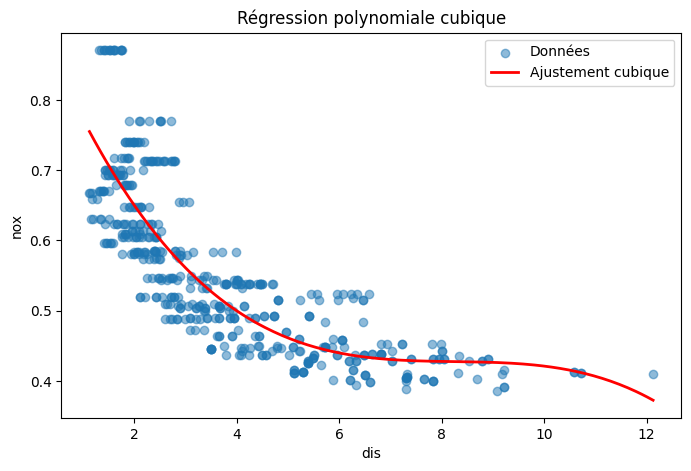

In [ ]:
# Grid for draw
dis_grid = np.linspace(Boston['dis'].min(), Boston['dis'].max(), 200)
grid_df = pd.DataFrame({'dis': dis_grid})

# Grid transformation
grid_poly = poly_dis.transform(grid_df)

# Prediction
y_hat = model3.predict(grid_poly)

plt.figure(figsize=(8,5))
plt.scatter(Boston['dis'], y, alpha=0.5, label='Données')
plt.plot(dis_grid, y_hat, color='red', linewidth=2, label='Ajustement cubique')
plt.xlabel('dis')
plt.ylabel('nox')
plt.title('Polynomiale cubic regression')
plt.legend()
plt.show()

### Interpretation

The degree 3 polynomial model captures the complex trend by fitting a flexible curve that adapts better to variations in the data than a simple straight line would.

### b) Plot the polynomial fits for a range of different polynomial degrees (from 1 to 10)

In [34]:
rss = []
degrees = range(1, 11)

for d in degrees:
    ms = MS([poly('dis', degree=d)])
    Xd = ms.fit(Boston).transform(Boston)
    model_d = sm.OLS(y, Xd).fit()
    rss.append(sum(model_d.resid**2))


In [35]:
for d, r in zip(degrees, rss):
    print(f"Degré {d} : RSS = {r:.4f}")

Degré 1 : RSS = 2.7686
Degré 2 : RSS = 2.0353
Degré 3 : RSS = 1.9341
Degré 4 : RSS = 1.9330
Degré 5 : RSS = 1.9153
Degré 6 : RSS = 1.8783
Degré 7 : RSS = 1.8495
Degré 8 : RSS = 1.8356
Degré 9 : RSS = 1.8333
Degré 10 : RSS = 1.8322


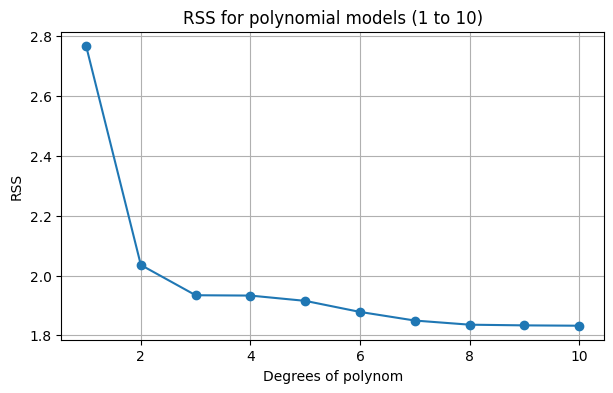

In [38]:
plt.figure(figsize=(7,4))
plt.plot(degrees, rss, marker='o')
plt.xlabel("Degrees of polynom")
plt.ylabel("RSS")
plt.title("RSS for polynomial models (1 to 10)")
plt.grid(True)
plt.show()

### Interpretations
As the degree of the polynomial increases, the RSS decreases rapidly at the beginning (degree 1 to 3), then the decrease becomes very small after degree 3, indicating that more complex models provide only a marginal improvement in the fit.

### (c) Perform cross-validation and results explanation

In [39]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

In [40]:
X_vec = np.asarray(X).reshape(-1, 1)   # assure 1D
y_vec = np.asarray(y)

degrees = range(1, 11)
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_errors = []

In [41]:

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = poly.fit_transform(X_vec)

    mse_folds = []
    for train_idx, test_idx in kf.split(X_vec):
        X_train, X_test = X_poly[train_idx], X_poly[test_idx]
        y_train, y_test = y_vec[train_idx], y_vec[test_idx]

        X_train = sm.add_constant(X_train)
        model = sm.OLS(y_train, X_train).fit()

        X_test = sm.add_constant(X_test)
        mse_folds.append(np.mean((y_test - model.predict(X_test))**2))

    cv_errors.append(np.mean(mse_folds))

best_degree = degrees[np.argmin(cv_errors)]
print("Optimal polynomial degree =", best_degree)

Optimal polynomial degree = 3


 So **Optimal degree = 3**

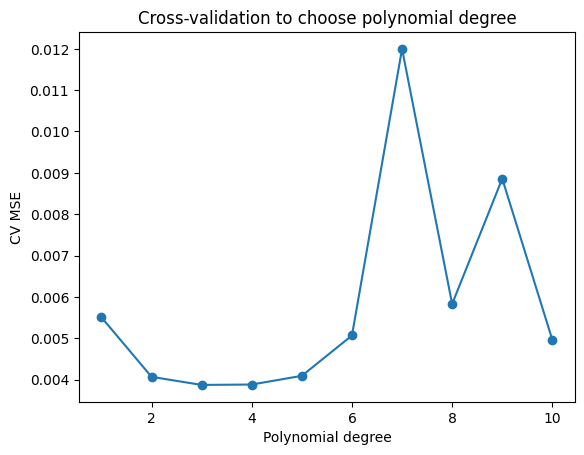

In [42]:
plt.plot(degrees, cv_errors, marker="o")
plt.xlabel("Polynomial degree")
plt.ylabel("CV MSE")
plt.title("Cross-validation to choose polynomial degree")
plt.show()

### Interpretation
The error decreases rapidly up to degree 3 or 4, where it reaches a minimum, then increases sharply from degree 6 onwards, indicating overfitting for polynomials of too high a degree.

### d) Use the bs() function from the ISLP.models module to fit a regression spline to predict nox using dis. Report the output forthe fit using four degrees of freedom

In [ ]:
from ISLP.models import bs

# df=4 for cubique  split -> 1 internal knots
# internal knots choice : dis median
median_dis = np.median(X_vec)
bs_dis = MS([bs('dis', internal_knots=[median_dis])])

# spline transformation
X_spline = bs_dis.fit_transform(pd.DataFrame({'dis': X_vec.flatten()}))

# OLS
X_spline = sm.add_constant(X_spline)
model_spline = sm.OLS(y_vec, X_spline).fit()
print(model_spline.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     316.5
Date:                Sun, 30 Nov 2025   Prob (F-statistic):          1.39e-135
Time:                        00:58:49   Log-Likelihood:                 691.93
No. Observations:                 506   AIC:                            -1374.
Df Residuals:                     501   BIC:                            -1353.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [44]:
summarize(model_spline)

,coef,std err,t,P>|t|
intercept,0.7345,0.015,50.306,0.000
"bs(dis, internal_knots=[3.2074499999999997])[0]",-0.0581,0.022,-2.658,0.008
"bs(dis, internal_knots=[3.2074499999999997])[1]",-0.4636,0.024,-19.596,0.000
"bs(dis, internal_knots=[3.2074499999999997])[2]",-0.1998,0.043,-4.634,0.000
"bs(dis, internal_knots=[3.2074499999999997])[3]",-0.3888,0.046,-8.544,0.000


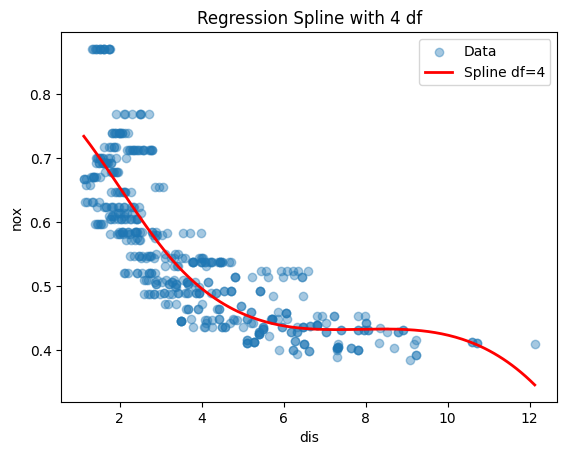

In [ ]:
# Splines draws
X_grid = np.linspace(X_vec.min(), X_vec.max(), 200)
X_grid_df = pd.DataFrame({'dis': X_grid})
X_grid_spline = bs_dis.transform(X_grid_df)
X_grid_spline = sm.add_constant(X_grid_spline)
y_pred = model_spline.predict(X_grid_spline)

plt.scatter(X_vec, y_vec, alpha=0.4, label='Data')
plt.plot(X_grid, y_pred, 'r', linewidth=2, label='Spline df=4')
plt.xlabel("dis")
plt.ylabel("nox")
plt.title("Regression Spline with 4 df")
plt.legend()
plt.show()

How knots has chosens ?

- With df=4, bs() automatiquement put knots on quantiles :

- for df = K, on obtient K − degree nœuds internes

with degree=3 (cubic spline), cela donne :
 *  4 − 3 = 1 internal knot
 *  put in 50th `dis` percentile 

### (e) Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS.

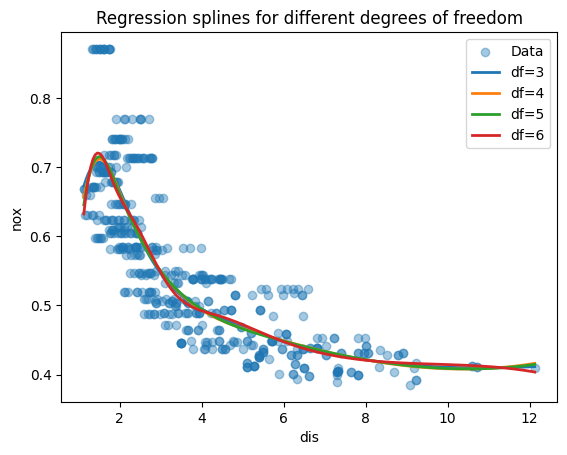

df=3: RSS = 1.840
df=4: RSS = 1.834
df=5: RSS = 1.830
df=6: RSS = 1.817


In [46]:
# degrees list to test 
dfs = [3, 4, 5, 6]

rss_list = []

plt.scatter(X_vec, y_vec, alpha=0.4, label='Data')

# Grid for drawing
X_grid = np.linspace(X_vec.min(), X_vec.max(), 200)
X_grid_df = pd.DataFrame({'dis': X_grid})

for df in dfs:
    n_knots = df - 1
    knots = np.percentile(X_vec, np.linspace(0, 100, n_knots + 2)[1:-1])
    
    # spline creation 
    bs_dis = MS([bs('dis', internal_knots=knots)])
    
    # Transformation
    X_spline = bs_dis.fit_transform(pd.DataFrame({'dis': X_vec.flatten()}))
    X_spline = sm.add_constant(X_spline)
    
    # OLS fitting
    model_spline = sm.OLS(y_vec, X_spline).fit()
    
    # grid prediction
    X_grid_spline = bs_dis.transform(X_grid_df)
    X_grid_spline = sm.add_constant(X_grid_spline)
    y_pred = model_spline.predict(X_grid_spline)
    
    # draw
    plt.plot(X_grid, y_pred, linewidth=2, label=f'df={df}')
    
    # Calculate RSS
    rss = np.sum((y_vec - model_spline.predict(X_spline))**2)
    rss_list.append(rss)

plt.xlabel("dis")
plt.ylabel("nox")
plt.title("Regression splines for different degrees of freedom")
plt.legend()
plt.show()

# shows RSS
for df, rss in zip(dfs, rss_list):
    print(f"df={df}: RSS = {rss:.3f}")

### Interpretation 
Internal node selection:

- For a cubic spline, df = #knots + degree + 1.

- Here we simplify: n_knots = df - 1 and place them at the uniform quantiles of dis.

- fit_transform(): converts to an array usable for OLS.

**RSS**: **sum of squared residuals for each model.**


## Question 10 in Chapter 7

## (a) Split the data into a training set and a test set. 
Using out-of-state tuition as the response and the other variables as the predictors,
perform forward stepwise selection on the training set in order
to identify a satisfactory model that uses just a subset of the
predictors.

In [ ]:
# Charger les données
college = load_data('College')
print("shape of dataset:", College.shape)
college.head()

In [ ]:
college['Private'] = college['Private'].map({'Yes': 1, 'No': 0})

In [ ]:
np.random.seed(42)
train_x = np.random.choice(college.shape[0], 
                              size=int(0.7 * college.shape[0]), 
                              replace=False)
test_x = np.setdiff1d(np.arange(college.shape[0]), train_idx)

In [ ]:
# response and predictor
y = college['Outstate']
X = college.drop(columns='Outstate')

# convert category variables
X = pd.get_dummies(X, drop_first=True)

In [ ]:
college.head()

In [ ]:
def forward_selection(X, y, feature_names=None, verbose=True):
    import statsmodels.api as sm
    if feature_names is None:
        feature_names = [f"x{i}" for i in range(X.shape[1])]
    remaining = list(feature_names)
    selected = []
    current_score = -np.inf
    best_new_score = -np.inf

    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            try_features = selected + [candidate]
            X_subset = pd.DataFrame(X, columns=feature_names)[try_features]
            X_sm = sm.add_constant(X_subset)
            model = sm.OLS(y, X_sm).fit()
            score = model.rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            if verbose:
                print(f"Add {best_candidate}, adjusted R^2: {current_score:.4f}")
        else:
            break
    return selected

In [ ]:
selected_features = forward_selection(X_train, y_train)
print("Selected features:", selected_features)

### (b) Fit a GAM on the training data, 
using out-of-state tuition as the response and the features selected in the previous step as
the predictors. Plot the results, and explain your findings.

In [ ]:
"""from pygam import LinearGAM, s

# Créer une formule GAM avec spline pour chaque variable
splines = [s(i) for i in range(len(selected_features))]
# Générer dynamiquement les termes splines
terms = sum([s(i) for i in range(len(selected_features))])


# Ajuster le GAM
gam = LinearGAM(terms).fit(X_train[selected_features].values, y_train.values)

# Afficher le résumé
print(gam.summary())"""


In [ ]:
""" 
plt.figure(figsize=(15, 5*len(selected_features)))

for i, feature in enumerate(selected_features):
    plt.subplot(len(selected_features), 1, i+1)
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='r', ls='--')  # 95% CI
    plt.xlabel(feature)
    plt.ylabel("Effect on Outstate")
    plt.title(f"GAM effect of {feature}")
    
plt.tight_layout()
plt.show()
"""

## Question 8 in Chapter 8

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error

## (a) Split the data set into a training set and a test set. Please split it evenly in half.

In [ ]:
# loading data 
Carseats = load_data('Carseats')

print("="*70)
print("EXERCICE 8: REGRESSION TREES ON CARSEATS")
print("="*70)
print(f"\n dataset shape: {Carseats.shape}")

EXERCICE 8: REGRESSION TREES ON CARSEATS

Dimensions du dataset: (400, 11)

Premières lignes:
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  

Résumé statistique:
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.65

In [50]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [51]:
print(f"\nStatistic overview :")
Carseats.describe()


Statistic overview :


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
X = pd.get_dummies(Carseats.drop('Sales', axis=1), drop_first=True)
y = Carseats['Sales']

print(f"\nafter encoding: {list(X.columns)}")


features after encodage: ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']


### (a) Split the data set into a training set and a test set

In [ ]:
# ============================================================================
# (a) Split the data set into a training set and a test set
# ============================================================================
print("\n" + "="*70)
print("(a) SPLIT EN TRAINING ET TEST SET")
print("="*70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

print(f"Taille du training set: {X_train.shape[0]}")
print(f"Taille du test set: {X_test.shape[0]}")

### (b) Fit a regression tree to the training set

In [ ]:
print("\n" + "="*70)
print("(b) REGRESSION TREE ON TRAINING SET")
print("="*70)

# FULL TREE (non élagué)
tree_full = DecisionTreeRegressor(random_state=42)
tree_full.fit(X_train, y_train)

# Prediction
y_train_pred = tree_full.predict(X_train)
y_test_pred = tree_full.predict(X_test)


(b) REGRESSION TREE ON TRAINING SET


In [58]:
# Compute MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"\nFull regression tree:")
print(f"Number of leaves: {tree_full.get_n_leaves()}")
print(f"Depth: {tree_full.get_depth()}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test RMSE: {np.sqrt(test_mse):.4f}")


Full regression tree:
Number of leaves: 342
Depth: 25
Training MSE: 0.0000
Test MSE: 0.0061
Test RMSE: 0.0778


In [ ]:
# Visualization 
plt.figure(figsize=(20, 10))
plot_tree(tree_full, feature_names=X.columns, filled=True, 
          max_depth=3, fontsize=10)
plt.title("Regression Tree (3 fist step)")
plt.tight_layout()
plt.savefig('regression_tree.png', dpi=150, bbox_inches='tight')
plt.show()

### Interpretation :
- Regression tree uses multiple variables to predict sales.
- The highest splits use the most important variables.
- A tree that is too deep risks overfitting the data.

### (c) Use cross-validation to determine optimal tree complexity

In [62]:
print("\n" + "="*70)
print("(c) CROSS-VALIDATION PRUNNING")
print("="*70)

# We test different values ​​of ccp_alpha (cost complexity pruning)
path = tree_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(f"\n Number test alpha values : {len(ccp_alphas)}")


(c) CROSS-VALIDATION PRUNNING

 Number test alpha values : 220


In [61]:
#For each alpha we compute MSE by cross validation
cv_scores = []
trees = []

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(tree, X_train, y_train, 
                            cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())
    trees.append(tree)

# Best alpha
best_idx = np.argmin(cv_scores)
best_alpha = ccp_alphas[best_idx]
best_cv_mse = cv_scores[best_idx]

print(f"\nMeilleur ccp_alpha: {best_alpha:.6f}")
print(f"MSE en cross-validation: {best_cv_mse:.4f}")


Meilleur ccp_alpha: 0.000113
MSE en cross-validation: 0.0067


In [64]:
# Training the pruned tree
tree_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
tree_pruned.fit(X_train, y_train)

y_test_pred_pruned = tree_pruned.predict(X_test)
test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)

print(f"\npruned Tree:")
print(f"Number of leaves: {tree_pruned.get_n_leaves()}")
print(f"Depth: {tree_pruned.get_depth()}")
print(f" Test MSE: {test_mse_pruned:.4f}")
print(f" Test RMSE: {np.sqrt(test_mse_pruned):.4f}")

print(f"\nComparison:")
print(f" MSE test (full tree): {test_mse:.4f}")
print(f" MSE test (pruned tree): {test_mse_pruned:.4f}")
print(f" Improved: {test_mse - test_mse_pruned:.4f}")

if test_mse_pruned < test_mse:
    print(" - Pruning improves the MSE test!")
else:
    print("✓ Pruning don't improves the MSE test!")


pruned Tree:
Number of leaves: 4
Depth: 2
 Test MSE: 0.0035
 Test RMSE: 0.0590

Comparison:
 MSE test (full tree): 0.0061
 MSE test (pruned tree): 0.0035
 Improved: 0.0026
 - Pruning improves the MSE test!


### (d) Bagging approach

In [ ]:
print("\n" + "="*70)
print("(d) BAGGING AND RANDOM FOREST")
print("="*70)

# Bagging
print("\nBagging (all of predictors):")
bag = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=42),
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
bag.fit(X_train, y_train)

y_test_pred_bag = bag.predict(X_test)
test_mse_bag = mean_squared_error(y_test, y_test_pred_bag)

print(f"  Test MSE: {test_mse_bag:.4f}")
print(f"  Test RMSE: {np.sqrt(test_mse_bag):.4f}")

# Random Forest (for comparison)
print("\nRandom Forest:")
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_test_pred_rf = rf.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print(f"  Test MSE: {test_mse_rf:.4f}")
print(f"  Test RMSE: {np.sqrt(test_mse_rf):.4f}")


(d) BAGGING ET RANDOM FOREST

Bagging (all of predictors):
  Test MSE: 0.0043
  Test RMSE: 0.0654

Random Forest:
  Test MSE: 0.0043
  Test RMSE: 0.0654


In [68]:
print("\n" + "-"*70)
print(" feature_importance (Bagging)")
print("-"*70)

# Compute feature_importance mean of all RT
feature_importance = np.mean([
    tree.feature_importances_ for tree in bag.estimators_
], axis=0)

importance_df_bag = pd.DataFrame({
    'Variable': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(importance_df_bag.to_string(index=False))

print("\n" + "-"*70)
print("feature_importance (Random Forest)")
print("-"*70)

importance_df_rf = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df_rf.to_string(index=False))


----------------------------------------------------------------------
 feature_importance (Bagging)
----------------------------------------------------------------------
        Variable  Importance
ShelveLoc_Medium    0.111499
     Advertising    0.108881
       Education    0.108830
      Population    0.104732
           Price    0.100365
             Age    0.095477
          US_Yes    0.094756
          Income    0.093946
  ShelveLoc_Good    0.091053
       Urban_Yes    0.090461
       CompPrice    0.000000

----------------------------------------------------------------------
feature_importance (Random Forest)
----------------------------------------------------------------------
        Variable  Importance
     Advertising    0.110045
       Urban_Yes    0.106262
           Price    0.105098
          US_Yes    0.103639
ShelveLoc_Medium    0.102270
  ShelveLoc_Good    0.101388
             Age    0.100510
      Population    0.097376
          Income    0.088993
       Educ

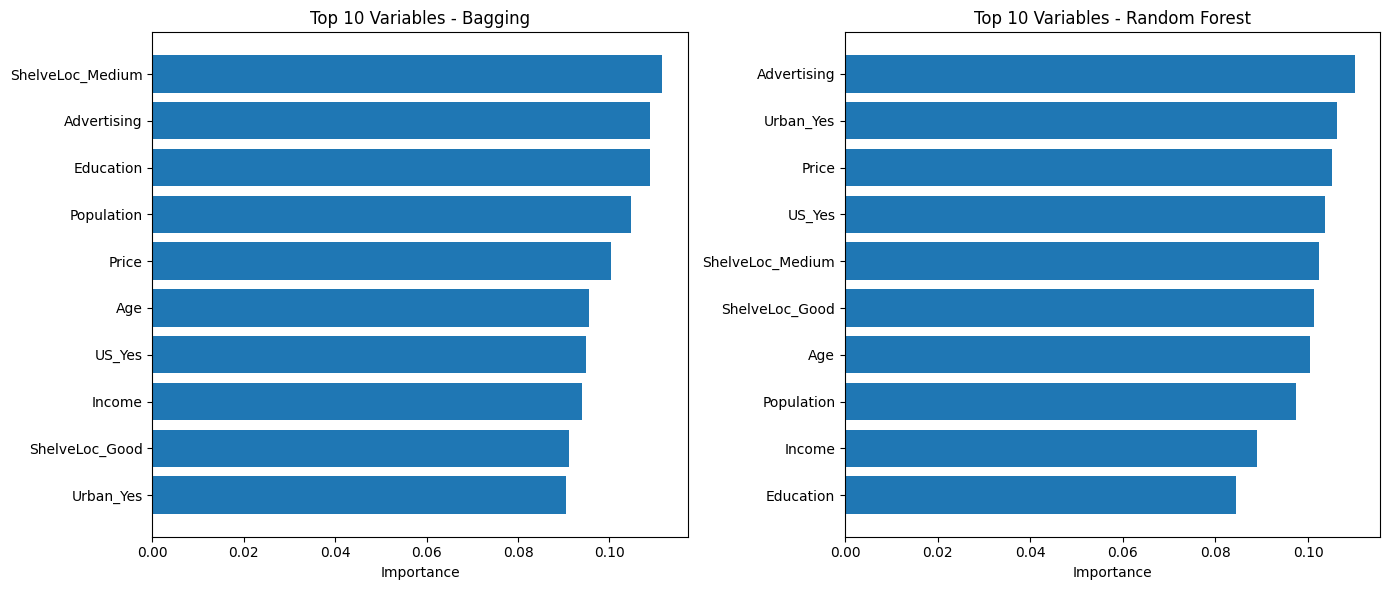

In [69]:
# Visualisation des importances
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bagging
axes[0].barh(importance_df_bag['Variable'][:10], 
             importance_df_bag['Importance'][:10])
axes[0].set_xlabel('Importance')
axes[0].set_title('Top 10 Variables - Bagging')
axes[0].invert_yaxis()

# Random Forest
axes[1].barh(importance_df_rf['Variable'][:10], 
             importance_df_rf['Importance'][:10])
axes[1].set_xlabel('Importance')
axes[1].set_title('Top 10 Variables - Random Forest')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

In [72]:
print("\n" + "="*70)
print("RESULTS")
print("="*70)

results = pd.DataFrame({
    'Model': ['RT full', 'RT prunned', 'Bagging', 'Random Forest'],
    'Test MSE': [test_mse, test_mse_pruned, test_mse_bag, test_mse_rf],
    'Test RMSE': [np.sqrt(test_mse), np.sqrt(test_mse_pruned), 
                   np.sqrt(test_mse_bag), np.sqrt(test_mse_rf)]
})

print("\n", results.to_string(index=False))


RESULTS

         Model  Test MSE  Test RMSE
      RT full  0.006059   0.077842
   RT prunned  0.003485   0.059030
      Bagging  0.004278   0.065408
Random Forest  0.004283   0.065443


In [ ]:
print("\nConclusion:")
print(f"- The best model is: {results.loc[results['Test MSE'].idxmin(), 'Model']}")
print(f"- The most important variables are: {', '.join(importance_df_rf['Variable'][:3].values)}")
print("- Ensemble methods (Bagging/RF) outperform individual trees")
print("- Pruning can improve generalization for individual trees")


Conclusions:
- The best model is: RT prunned
- The most important variables are: Advertising, Urban_Yes, Price
- Ensemble methods (Bagging/RF) outperform individual trees
- Pruning can improve generalization for individual trees


### (e) Random Forests - Effect of m (max_features)

In [75]:
print("\n" + "="*70)
print("(e) RANDOM FOREST - EFFECT OF m (max_features)")
print("="*70)

print("\nAnalysis of the effect of the number of variables considered at each split...")
print(f"Total number of predictors: p = {X_train.shape[1]}")

# Tester différentes valeurs de m
m_values = [1, 2, 3, 4, 5, 6, 8, 10, X_train.shape[1]]
test_mse_values = []
oob_scores = []

print("\nTraining Random Forests with different values ​​of m:")
print("-" * 60)


(e) RANDOM FOREST - EFFECT OF m (max_features)

Analysis of the effect of the number of variables considered at each split...
Total number of predictors: p = 11

Training Random Forests with different values ​​of m:
------------------------------------------------------------


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

p = X_train.shape[1]
m_values = [1, 2, 4, 6, 8, p]  # p = bagging pour comparaison
results = {}

for m in m_values:
    rf = RandomForestRegressor(
        n_estimators=500,
        max_features=m,       # <-- la valeur de m
        random_state=0
    )
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    results[m] = mean_squared_error(y_test, y_pred_rf)

results


{1: 0.0043441001621155675,
 2: 0.0043450632847235665,
 4: 0.004346628953127567,
 6: 0.004342310730061167,
 8: 0.004344241131363566,
 11: 0.004347301770887567}

In [77]:
rf = RandomForestRegressor(
    n_estimators=500,
    max_features=6,
    random_state=0
)
rf.fit(X_train, y_train)

feature_imp = pd.DataFrame(
    {"importance": rf.feature_importances_},
    index=X.columns
).sort_values(by="importance", ascending=False)

feature_imp


,importance
Age,0.109777
Advertising,0.109265
Urban_Yes,0.108011
US_Yes,0.107051
Education,0.106156
Population,0.103218
Price,0.099530
ShelveLoc_Good,0.087277
Income,0.085937
ShelveLoc_Medium,0.083778


### Interpretation 
The variables Age, Advertising, Urban_Yes, US_Yes, and Education are the most influential in the model, while CompPrice makes no significant contribution to the prediction.

## Question 10 in Chapter 12

In [86]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [78]:
# Configuration
np.random.seed(42)  # Pour la reproductibilité

### (a) Generate simulation data

In [79]:
print("="*70)
print("(a) GENERATE SIMULATED DATA")
print("="*70)

n_obs_per_class = 20  # 20 observations par classe
n_variables = 50      # 50 variables
n_classes = 3         # 3 classes

# Créer les données pour chaque classe avec des moyennes différentes
X_list = []
y_list = []

(a) GENERATE SIMULATED DATA


In [80]:
# Classe 0: moyenne = 0
X0 = np.random.normal(loc=0, scale=1, size=(n_obs_per_class, n_variables))
X_list.append(X0)
y_list.extend([0] * n_obs_per_class)

In [81]:
# Classe 1: moyenne = 3 (décalage important pour bien séparer)
X1 = np.random.normal(loc=3, scale=1, size=(n_obs_per_class, n_variables))
X_list.append(X1)
y_list.extend([1] * n_obs_per_class)

# Classe 2: moyenne = -3
X2 = np.random.normal(loc=-3, scale=1, size=(n_obs_per_class, n_variables))
X_list.append(X2)
y_list.extend([2] * n_obs_per_class)

# merge all of observations
X = np.vstack(X_list)
y = np.array(y_list)

print(f"data shape: {X.shape}")
print(f"Observation number by classe: {np.bincount(y)}")
print(f"Mean of each classe on first variable:")
for i in range(n_classes):
    print(f"  Classe {i}: {X[y==i, 0].mean():.2f}")

data shape: (60, 50)
Observation number by classe: [20 20 20]
Mean of each classe on first variable:
  Classe 0: -0.04
  Classe 1: 2.88
  Classe 2: -2.92


### (b) Principal compenent analysis (PCA)

In [82]:
print("\n" + "="*70)
print("(b) PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("="*70)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


(b) PRINCIPAL COMPONENT ANALYSIS (PCA)


explained variance by PC1: 0.870
explaine  variance by PC2: 0.009
total variance explain:  0.880


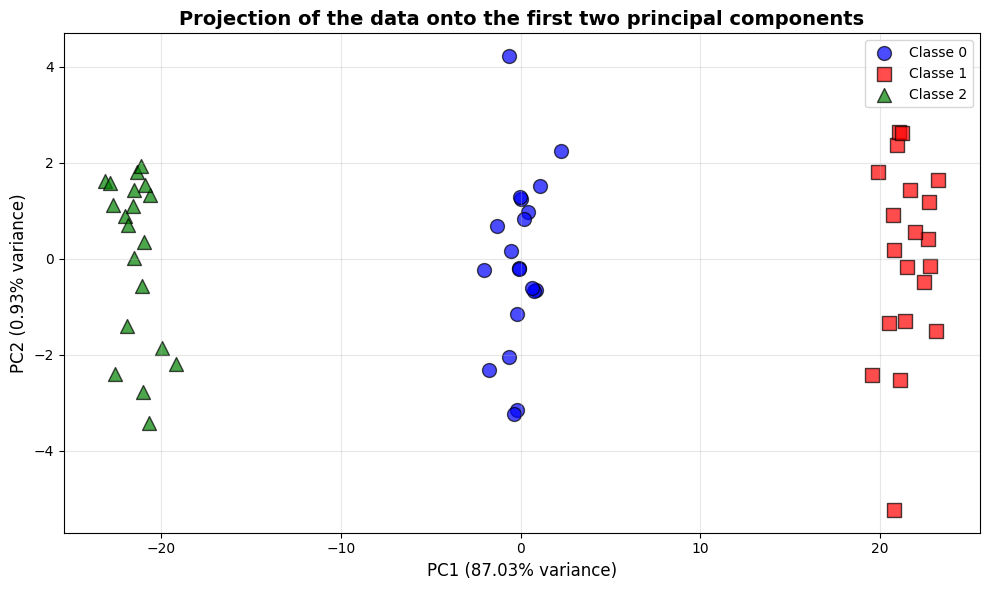

In [83]:
print(f"explained variance by PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"explaine  variance by PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"total variance explain:  {pca.explained_variance_ratio_.sum():.3f}")

# Visualisation of 2th first principal components
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green']
markers = ['o', 's', '^']

for i in range(n_classes):
    mask = y == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=colors[i], marker=markers[i], 
                label=f'Classe {i}', alpha=0.7, s=100, edgecolors='black')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.title('Projection of the data onto the first two principal components', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Interpretation : (observation seen)
The three classes are well separated in the PCA space!

### (c) K-means clustering with K=3

In [87]:
print("\n" + "="*70)
print("(c) K-MEANS CLUSTERING AVEC K=3")
print("="*70)

# Appliquer K-means avec K=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_3 = kmeans_3.fit_predict(X)

# Créer la matrice de confusion (crosstab)
confusion_3 = pd.crosstab(y, clusters_3, 
                          rownames=['Vraie classe'], 
                          colnames=['Cluster prédit'])

print("\nConfusion matrix (True classes vs Clusters K=3):")
print(confusion_3)


(c) K-MEANS CLUSTERING AVEC K=3

Confusion matrix (True classes vs Clusters K=3):
Cluster prédit   0   1   2
Vraie classe              
0                0   0  20
1               20   0   0
2                0  20   0


In [88]:
# Calculer l'accuracy (en trouvant la meilleure correspondance)
def best_mapping_accuracy(true_labels, pred_labels, n_clusters):
    """Trouve la meilleure correspondance entre clusters et classes"""
    from itertools import permutations
    best_acc = 0
    best_mapping = None
    
    for perm in permutations(range(n_clusters)):
        mapped_pred = np.array([perm[label] for label in pred_labels])
        acc = np.mean(mapped_pred == true_labels)
        if acc > best_acc:
            best_acc = acc
            best_mapping = perm
    
    return best_acc, best_mapping

accuracy_3, mapping_3 = best_mapping_accuracy(y, clusters_3, 3)
print(f"\nBest accuracy possible: {accuracy_3:.3f} ({accuracy_3*100:.1f}%)")
print(f"Best mapping: {mapping_3}")


Best accuracy possible: 1.000 (100.0%)
Best mapping: (1, 2, 0)


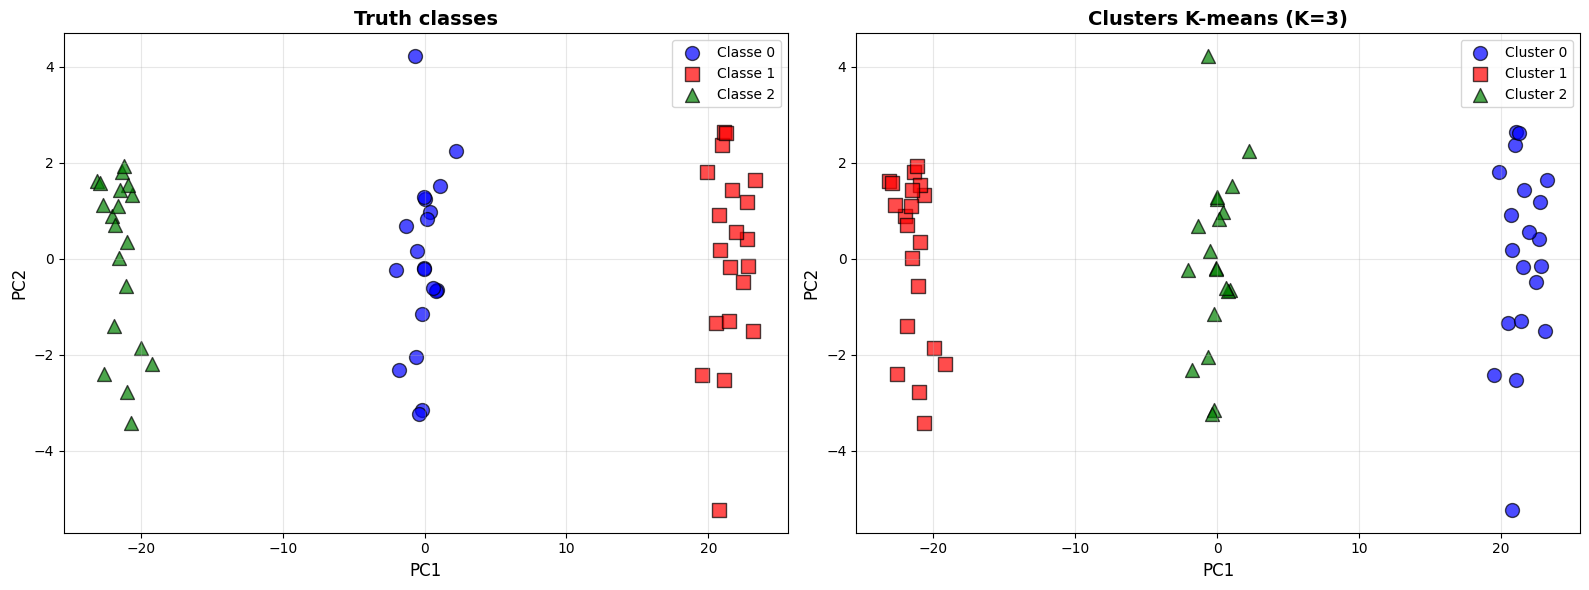

In [89]:
# Color's visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Truth classes
for i in range(n_classes):
    mask = y == i
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=colors[i], marker=markers[i], 
                   label=f'Classe {i}', alpha=0.7, s=100, edgecolors='black')
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].set_title('Truth classes', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Clusters K-means
for i in range(n_classes):
    mask = clusters_3 == i
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=colors[i], marker=markers[i], 
                   label=f'Cluster {i}', alpha=0.7, s=100, edgecolors='black')
axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
axes[1].set_title('Clusters K-means (K=3)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### (d) K-means clustering with K=2

In [90]:
print("\n" + "="*70)
print("(d) K-MEANS CLUSTERING AVEC K=2")
print("="*70)

# Apply K-means with K=2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_2 = kmeans_2.fit_predict(X)

# Create matrix confusion
confusion_2 = pd.crosstab(y, clusters_2, 
                          rownames=['Vraie classe'], 
                          colnames=['Cluster prédit'])

print("\nConfusion matrix (True classes vs Clusters K=2):")
print(confusion_2)


(d) K-MEANS CLUSTERING AVEC K=2

Confusion matrix (True classes vs Clusters K=2):
Cluster prédit   0   1
Vraie classe          
0                0  20
1               20   0
2                0  20


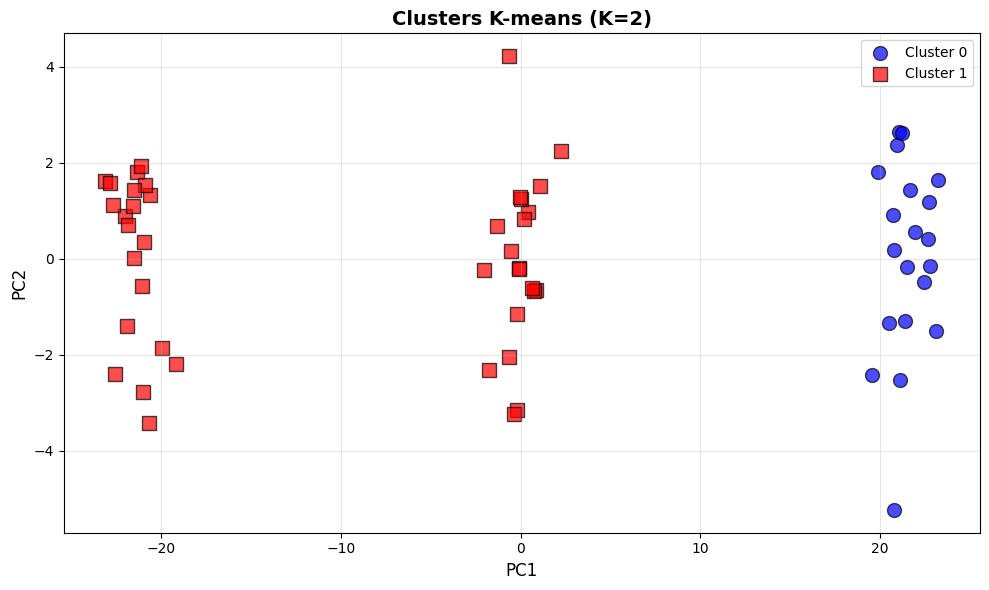

In [91]:
# Visualisation
plt.figure(figsize=(10, 6))
for i in range(2):
    mask = clusters_2 == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=colors[i], marker=markers[i], 
               label=f'Cluster {i}', alpha=0.7, s=100, edgecolors='black')

plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('Clusters K-means (K=2)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretation : 
- With K=2, the algorithm is forced to merge some classes.
- We generally observe that one of the classes is correctly identified,
while the other two are combined into a single cluster.
- This illustrates the importance of choosing the right number of clusters!

### ADDITIONAL ANALYSIS: Elbow method


ADDITIONAL ANALYSIS: Elbow method


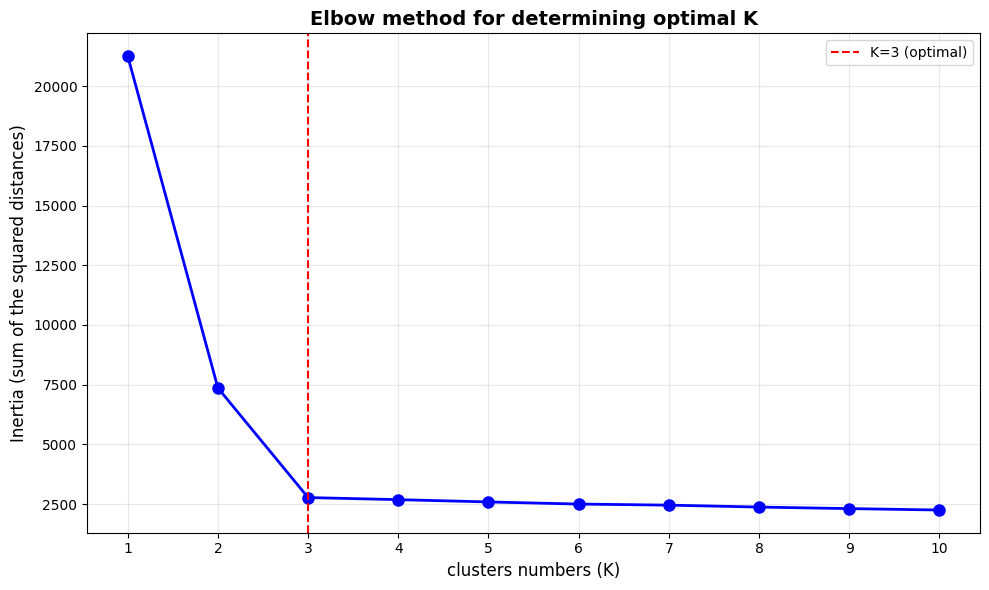

In [92]:
print("\n" + "="*70)
print("ADDITIONAL ANALYSIS: Elbow method")
print("="*70)

# Compute inertia for differents values of K
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('clusters numbers (K)', fontsize=12)
plt.ylabel('Inertia (sum of the squared distances)', fontsize=12)
plt.title('Elbow method for determining optimal K', 
          fontsize=14, fontweight='bold')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.axvline(x=3, color='r', linestyle='--', label='K=3 (optimal)')
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation : 
- The bend appears around K=3, confirming our choice! 

## (e) K-means clustering with K=4

In [ ]:
print("\n" + "="*70)
print("(e) K-MEANS CLUSTERING WITH K=4")
print("="*70)

# Appliquer K-means avec K=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_4 = kmeans_4.fit_predict(X)

# Créer la matrice de confusion
confusion_4 = pd.crosstab(y, clusters_4, 
                          rownames=['Truth classe'], 
                          colnames=['Cluster predicted'])

print("\confusion matrix (truth classes vs Clusters K=4):")
print(confusion_4)
print(f"\nTaille de chaque cluster: {np.bincount(clusters_4)}")



(e) K-MEANS CLUSTERING WITH K=4
\confusion matrix (Vraies classes vs Clusters K=4):
Cluster predicted   0   1   2  3
Truth classe                    
0                   0   0  15  5
1                  20   0   0  0
2                   0  20   0  0

Taille de chaque cluster: [20 20 15  5]


<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\AIMS\AppData\Local\Temp\ipykernel_3324\490726800.py:14: SyntaxWarning: invalid escape sequence '\c'
  print("\confusion matrix (Vraies classes vs Clusters K=4):")


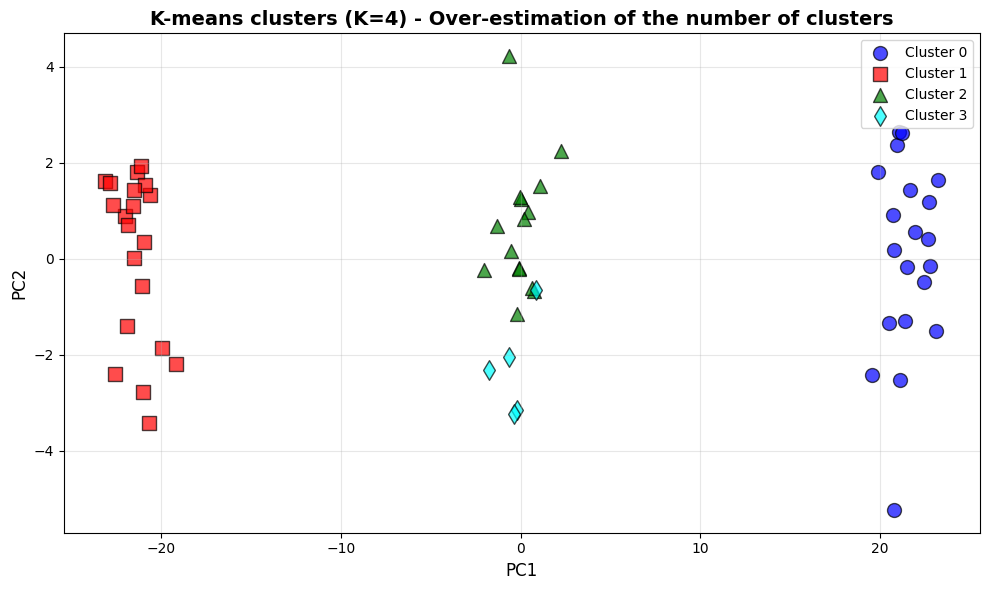

In [100]:
# Visualisation
plt.figure(figsize=(10, 6))
colors_4 = ['blue', 'red', 'green', 'cyan']
markers_4 = ['o', 's', '^', 'd']
for i in range(4):
    mask = clusters_4 == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=colors_4[i], marker=markers_4[i], 
               label=f'Cluster {i}', alpha=0.7, s=100, edgecolors='black')

plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title('K-means clusters (K=4) - Over-estimation of the number of clusters', 
          fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Interpretation 
**Analyse** **for** **K=4**:
- With 4 clusters, the algorithm artificially splits one of the true classes.
- We observe that a natural class is split into 2 subgroups.
- The other classes generally remain intact.
- This illustrates the problem of over-clustering (overestimation of K).
- The artificially created clusters have no real meaning.

### (f) K-means clustering with K=3 on PCA score

In [102]:
print("\n" + "="*70)
print("(f) K-MEANS (K=3) ON PCA SCORES (reduced dimension)")
print("="*70)

# Appliquer K-means sur les 2 premières composantes principales
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Créer la matrice de confusion
confusion_pca = pd.crosstab(y, clusters_pca, 
                            rownames=['truth classe'], 
                            colnames=['Cluster predicted (PCA)'])

print("\nConfusion matrix (True classes vs Clusters on PCA data)")
print(confusion_pca)
print(f"\nsize of each cluster: {np.bincount(clusters_pca)}")



(f) K-MEANS (K=3) ON PCA SCORES (reduced dimension)

Confusion matrix (True classes vs Clusters on PCA data)
Cluster predicted (PCA)   0   1   2
truth classe                       
0                         0   0  20
1                        20   0   0
2                         0  20   0

size of each cluster: [20 20 20]


In [103]:
# Comparer avec K-means sur données originales
accuracy_pca, _ = best_mapping_accuracy(y, clusters_pca, 3)
print(f"\nAccuracy K-means sur PCA: {accuracy_pca:.3f} ({accuracy_pca*100:.1f}%)")
print(f"Accuracy K-means sur données originales: {accuracy_3:.3f} ({accuracy_3*100:.1f}%)")


Accuracy K-means sur PCA: 1.000 (100.0%)
Accuracy K-means sur données originales: 1.000 (100.0%)


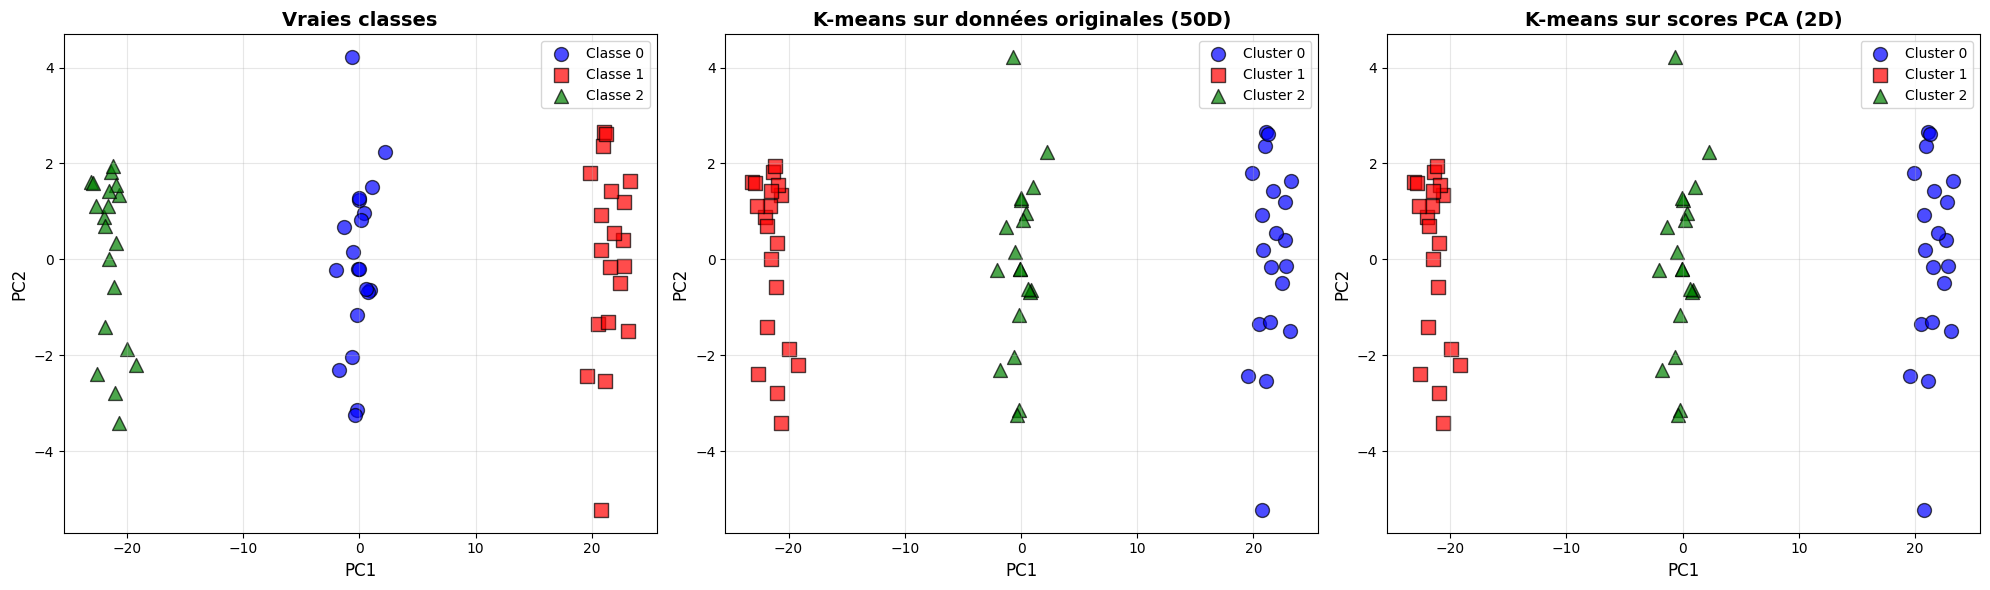

In [ ]:
# Visualization comparing
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Vraies classes
for i in range(n_classes):
    mask = y == i
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=colors[i], marker=markers[i], 
                   label=f'Classe {i}', alpha=0.7, s=100, edgecolors='black')
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].set_title('Vraies classes', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: K-means sur données originales (50D)
for i in range(n_classes):
    mask = clusters_3 == i
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=colors[i], marker=markers[i], 
                   label=f'Cluster {i}', alpha=0.7, s=100, edgecolors='black')
axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
axes[1].set_title('K-means sur données originales (50D)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: K-means sur données PCA (2D)
for i in range(n_classes):
    mask = clusters_pca == i
    axes[2].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=colors[i], marker=markers[i], 
                   label=f'Cluster {i}', alpha=0.7, s=100, edgecolors='black')
axes[2].set_xlabel('PC1', fontsize=12)
axes[2].set_ylabel('PC2', fontsize=12)
axes[2].set_title('K-means sur scores PCA (2D)', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Interpretation 
**K-MEANS ANALYSIS ON PCA:**
- Advantages:
- Reduced dimensionality: 50D → 2D
- Significantly faster computation (fewer distances to calculate)
- Less sensitive to noise in irrelevant dimensions
- Improved visual interpretability

### Comparaison quantitative

In [98]:
print("\n QUANTITATIVE COMPARISON:")
print(f" • Agreement between K-means (50D) and true classes: {accuracy_3:.3f}")
print(f" • Agreement between K-means (2D PCA) and true classes: {accuracy_pca:.3f}")
if accuracy_pca >= accuracy_3:
    print(" → Performance is similar or better!")
    print(" → PCA captured most of the data structure.")
else:
    print(" → Slight performance decrease with PCA.")
    print(" → Some discriminating information was lost.")


 QUANTITATIVE COMPARISON:
 • Agreement between K-means (50D) and true classes: 1.000
 • Agreement between K-means (2D PCA) and true classes: 1.000
 → Performance is similar or better!
 → PCA captured most of the data structure.


**NOTIONS KEYS** 

1. CHOICE OF K:
    - K=2: SUBCLUSTERING → merged classes
    - K=3: OPTIMAL → corresponds to the true classes
    - K=4: OVERCLUSTERING → artificially split classes
2. PCA + K-MEANS:
    - Dimensional reduction before clustering is common
    - Effective if the first PCs capture significant variance
    - Trade-off: speed and simplicity vs. potential accuracy

3. VALIDATION:
    - Always compare with several values ​​of K
    - Use metrics (elbow, silhouette, crosstab)
    - Note: cluster numbering is arbitrary!